In [53]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [54]:
loan=pd.read_csv('D:\DataTrained Projects\Evaluation Projects\Week 2/loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Loaded Dataset

In [55]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see that there are few nan values in data and also we have categorical datatype columns

In [56]:
print(loan.isnull().values.any())
loan.isnull().sum()

True


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Most of the columns are containing NaN values, so we need fill or delete those NaN values

In [57]:
loan.drop(['Loan_ID'],axis=1,inplace=True)

Dropped Loan_ID column as it is having all unique values

<AxesSubplot:xlabel='count', ylabel='Gender'>

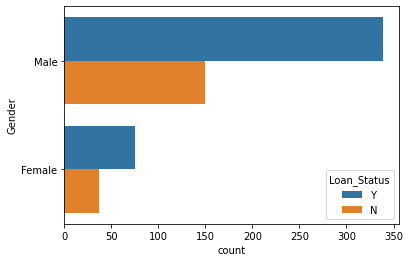

In [30]:
sns.countplot(y='Gender',hue='Loan_Status',data=loan)

We can see that more number of male people are applying for loan when compared to female

<AxesSubplot:xlabel='count', ylabel='Married'>

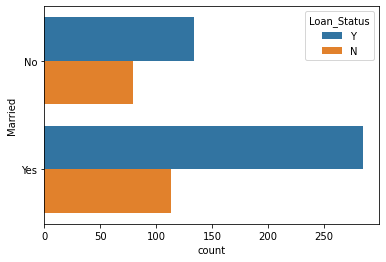

In [31]:
sns.countplot(y='Married',hue='Loan_Status',data=loan)

We can see that more number of married people are applying for loan

<AxesSubplot:xlabel='count', ylabel='Dependents'>

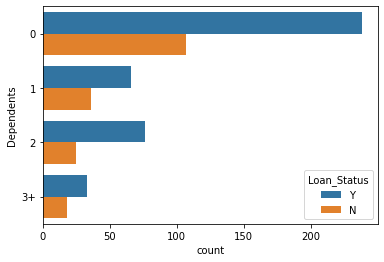

In [32]:
sns.countplot(y='Dependents',hue='Loan_Status',data=loan)

We can observe that  more people with no dependents are applying for loan

<AxesSubplot:xlabel='count', ylabel='Education'>

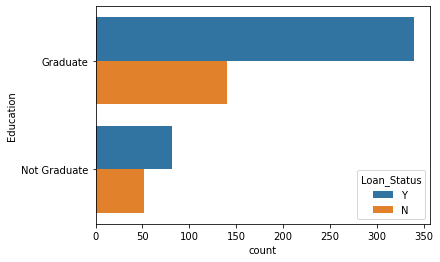

In [33]:
sns.countplot(y='Education',hue='Loan_Status',data=loan)

We can see that more number of graduates are applying for loan

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

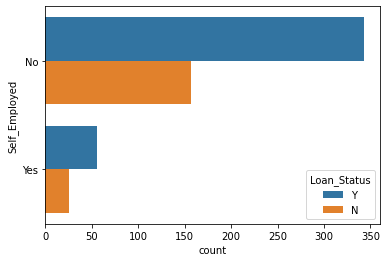

In [34]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=loan)

We can that more number of people who are not self_employed re applying for loan

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

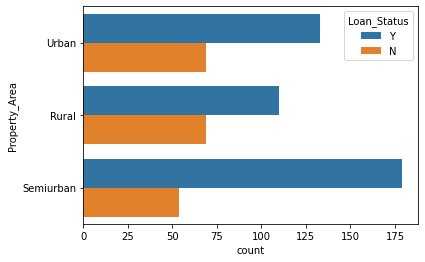

In [35]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=loan)

We can see that more number of people who stay in semiurban area are applying for loan

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

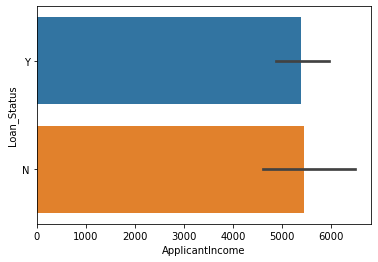

In [36]:
sns.barplot(x='ApplicantIncome',y='Loan_Status',data=loan)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

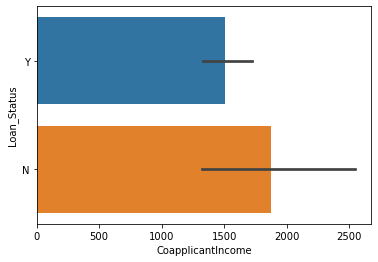

In [37]:
sns.barplot(x='CoapplicantIncome',y='Loan_Status',data=loan)

<AxesSubplot:xlabel='LoanAmount', ylabel='Loan_Status'>

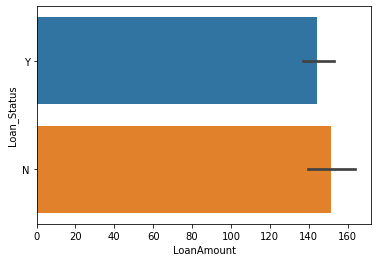

In [38]:
sns.barplot(x='LoanAmount',y='Loan_Status',data=loan)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

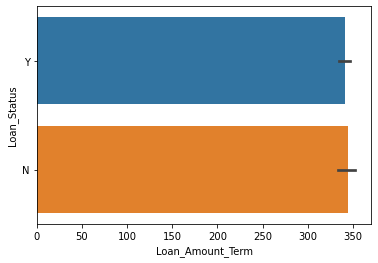

In [39]:
sns.barplot(x='Loan_Amount_Term',y='Loan_Status',data=loan)

<AxesSubplot:xlabel='Credit_History', ylabel='Loan_Status'>

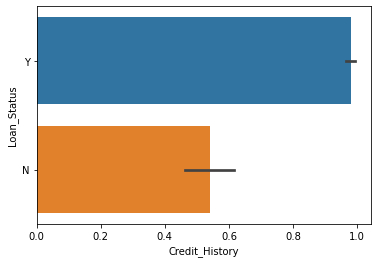

In [40]:
sns.barplot(x='Credit_History',y='Loan_Status',data=loan)

We can see that more number of people with credit history are applying for loan

In [58]:
from scipy import stats
print(loan['Gender'].mode())
print(loan['Married'].mode())
print(loan['Dependents'].mode())
print(loan['Self_Employed'].mode())
print(loan['LoanAmount'].mean())
print(loan['Loan_Amount_Term'].mean())
print(loan['Credit_History'].mean())

0    Male
dtype: object
0    Yes
dtype: object
0    0
dtype: object
0    No
dtype: object
146.41216216216216
342.0
0.8421985815602837


In [59]:
loan['Gender']=loan['Gender'].replace(np.NaN,'Male')
loan['Married']=loan['Married'].replace(np.NaN,'Yes')
loan['Dependents']=loan['Dependents'].replace(np.NaN,0)
loan['Self_Employed']=loan['Self_Employed'].replace(np.NaN,'No')
loan['LoanAmount']=loan['LoanAmount'].replace(np.NaN,146.41216216216216)
loan['Loan_Amount_Term']=loan['Loan_Amount_Term'].replace(np.NaN,342.0)
loan['Credit_History']=loan['Credit_History'].replace(np.NaN,0.8421985815602837)

Replaced all null values with mean/median/mode

In [96]:
print(loan.isnull().values.any())
loan.isnull().sum()

False


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
print(loan['Gender'].value_counts())
print('--------------')
print(loan['Married'].value_counts())
print('--------------')
print(loan['Dependents'].value_counts())
print('--------------')
print(loan['Education'].value_counts())
print('--------------')
print(loan['Self_Employed'].value_counts())
print('--------------')
print(loan['Property_Area'].value_counts())
print('--------------')
print(loan['Loan_Status'].value_counts())

1    502
0    112
Name: Gender, dtype: int64
--------------
1    401
0    213
Name: Married, dtype: int64
--------------
0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64
--------------
1    480
0    134
Name: Education, dtype: int64
--------------
0    532
1     82
Name: Self_Employed, dtype: int64
--------------
0    233
1    202
2    179
Name: Property_Area, dtype: int64
--------------
Y    422
N    192
Name: Loan_Status, dtype: int64


In [68]:
loan['Gender']=loan['Gender'].replace('Male',1).replace('Female',0)
loan['Married']=loan['Married'].replace('Yes',1).replace('No',0)
loan['Dependents']=loan['Dependents'].replace('0',0).replace('1',1).replace('2',2).replace('3+',3)
loan['Education']=loan['Education'].replace('Graduate',1).replace('Not Graduate',0)
loan['Self_Employed']=loan['Self_Employed'].replace('No',0).replace('Yes',1)
loan['Property_Area']=loan['Property_Area'].replace('Semiurban',0).replace('Urban',1).replace('Rural',2)
loan['Loan_Status']=loan['Loan_Status'].replace('Y',1).replace('N',0)

Converted all categorical columns to numberical datatype

In [69]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [70]:
corr_mat=loan.corr()
corr_mat

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,0.109521,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,-0.007281,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.037392,-0.001601,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.077936,-0.066740,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,0.007124,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,0.017321,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.019087,-0.059187
LoanAmount,0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,0.029024,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.017349,-0.020974
Credit_History,0.012819,0.005852,-0.037392,0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.035519,0.540483


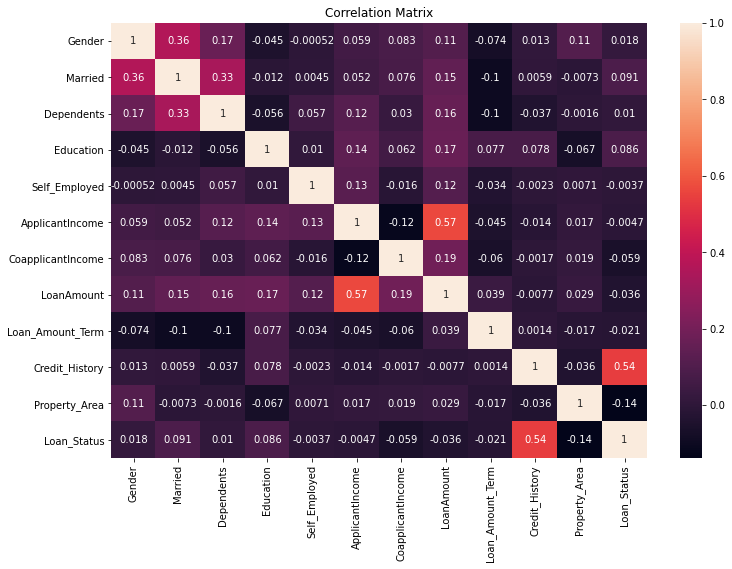

In [71]:
plt.figure(figsize=[12,8])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [72]:
corr_target=loan.corrwith(loan['Loan_Status'],axis=0)
corr_target

Gender               0.017987
Married              0.091478
Dependents           0.010118
Education            0.085884
Self_Employed       -0.003700
ApplicantIncome     -0.004710
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
Credit_History       0.540483
Property_Area       -0.137545
Loan_Status          1.000000
dtype: float64

We can observe that Credit_History is having strong relation with Loan_Status

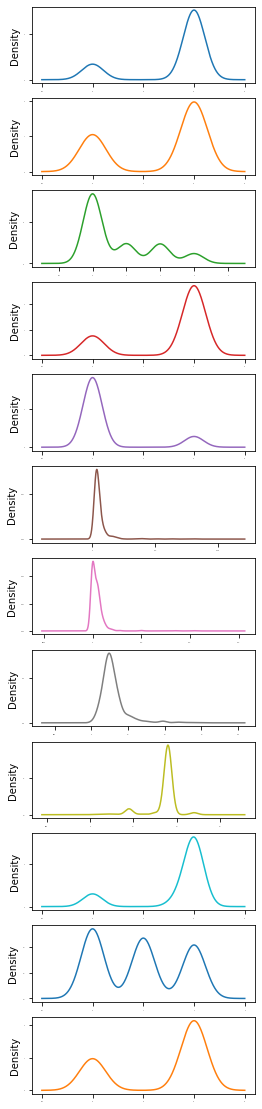

In [74]:
loan.plot(kind='density',subplots=True, sharex=False, legend=False, fontsize=1, figsize=[4,20])
plt.show()

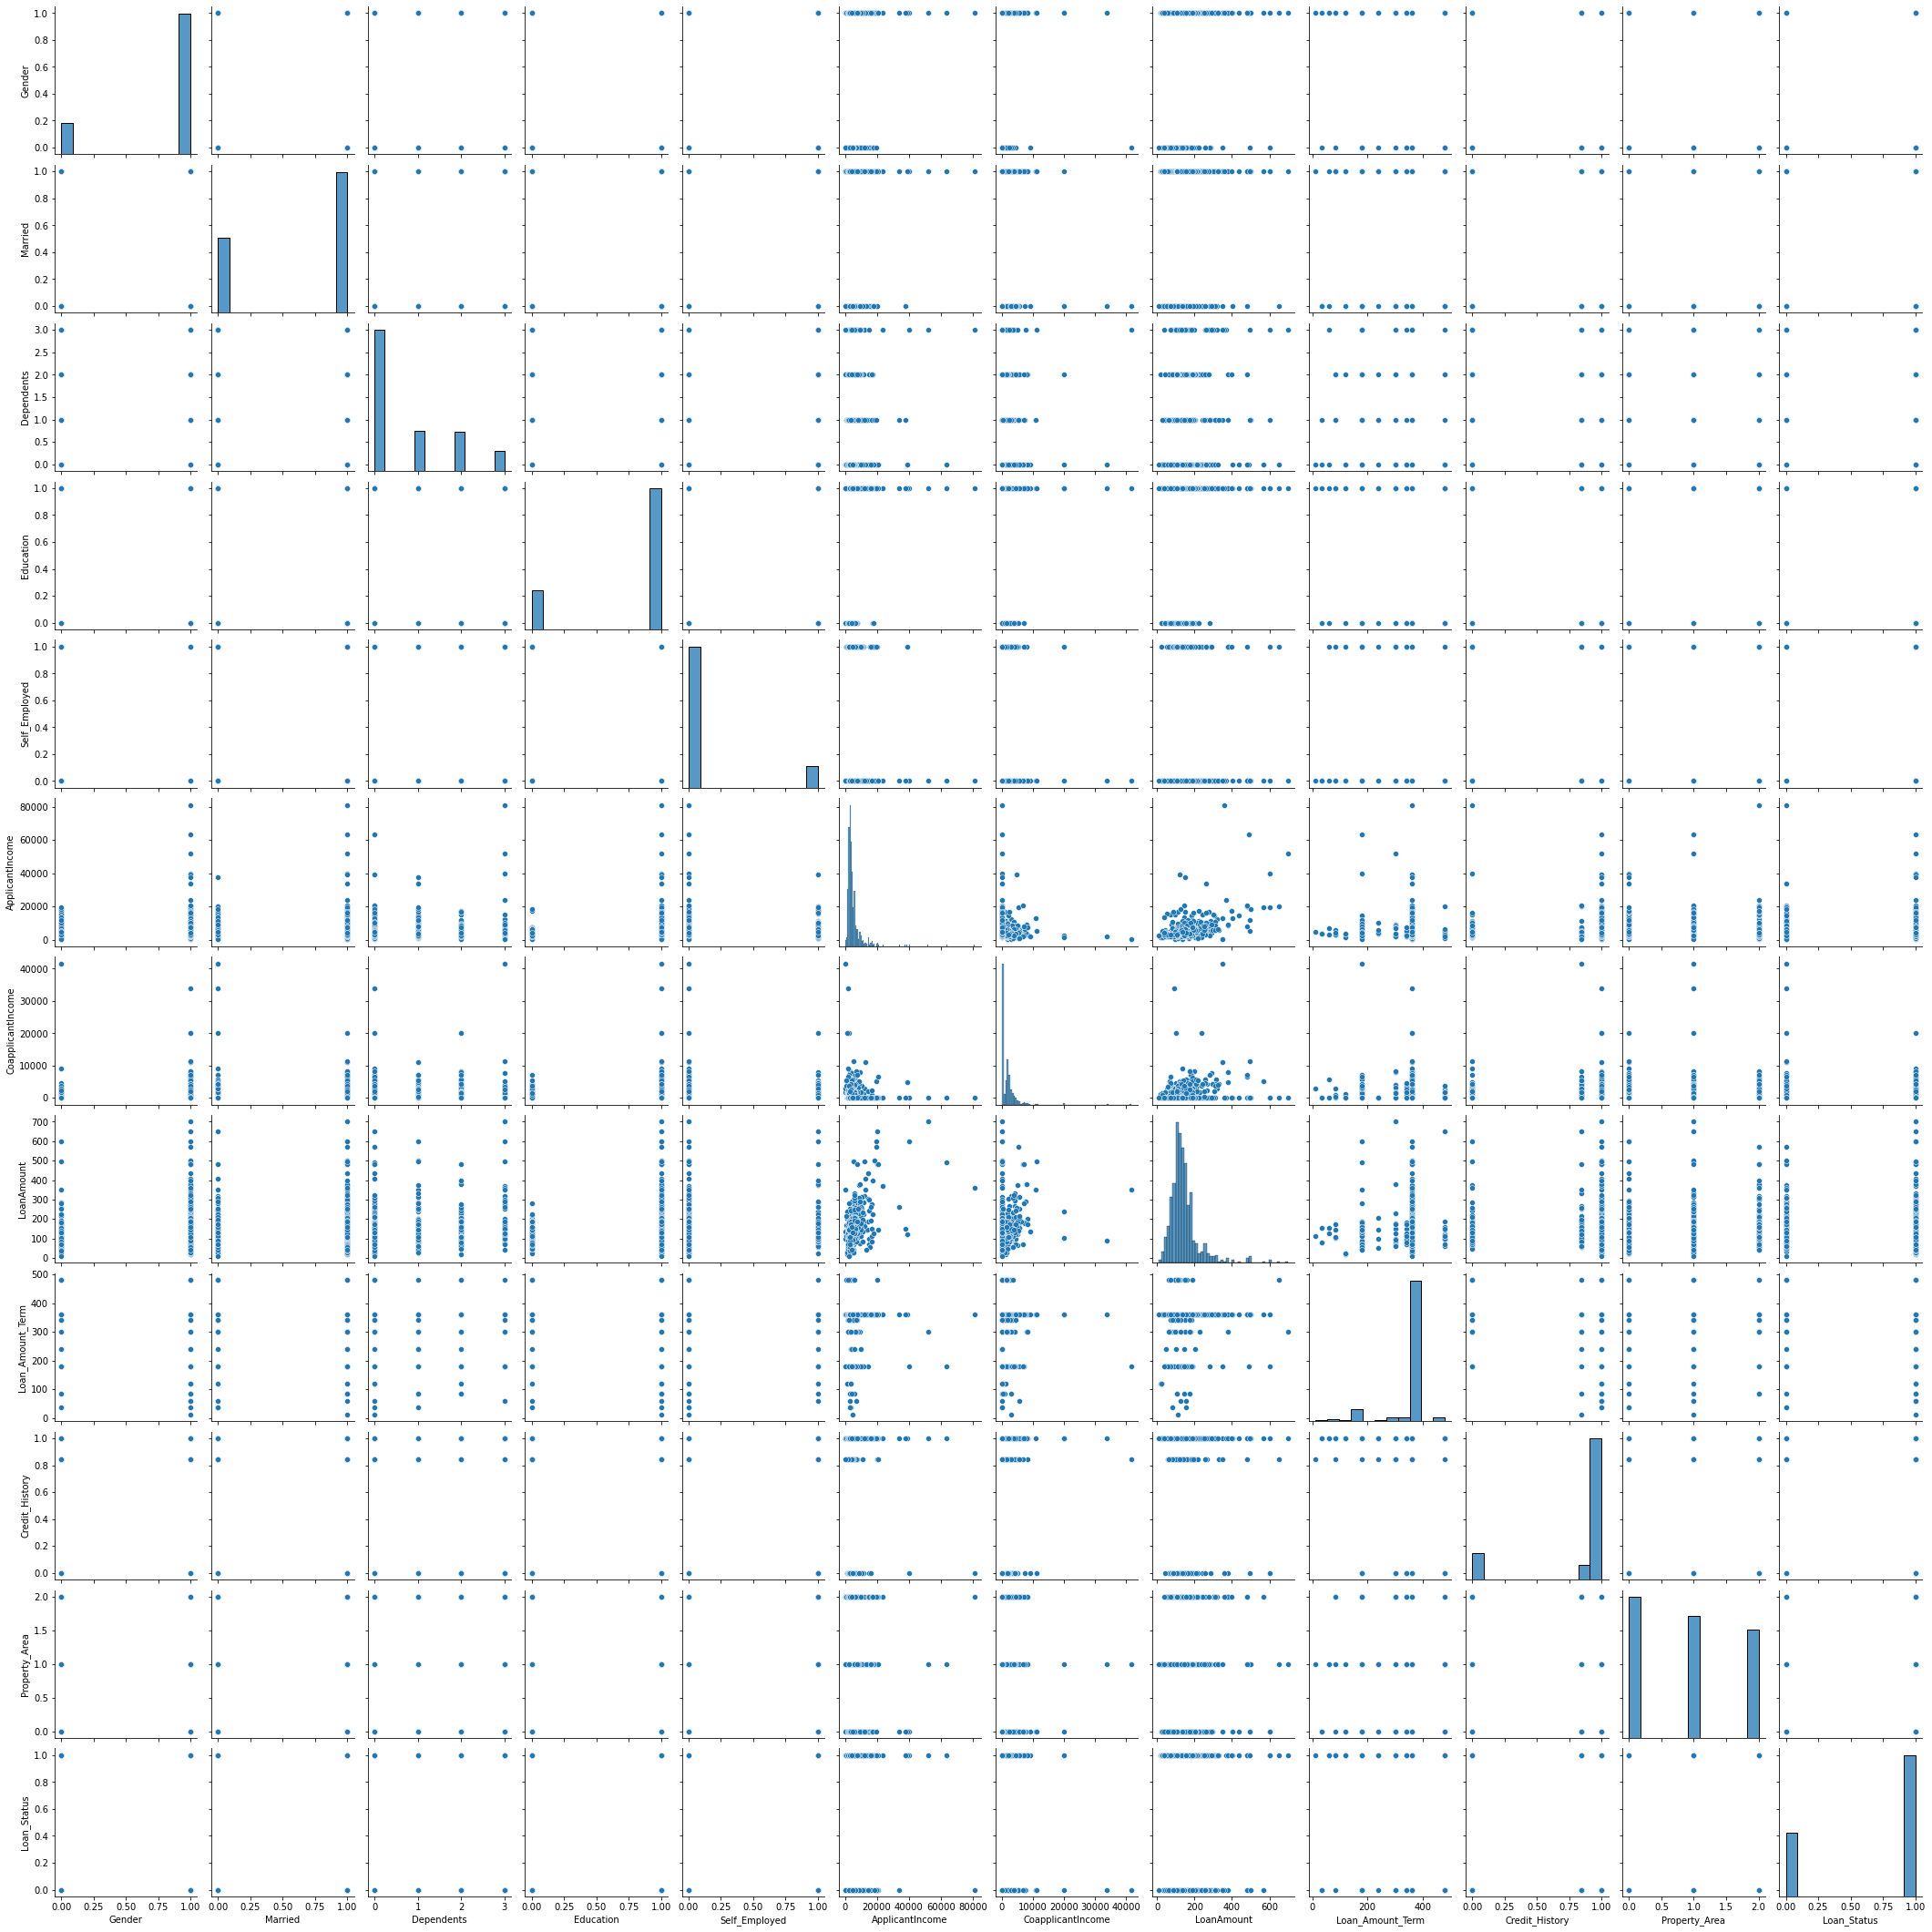

In [75]:
sns.pairplot(loan)
plt.show()

Density and pairplot show that there are few outliers in data

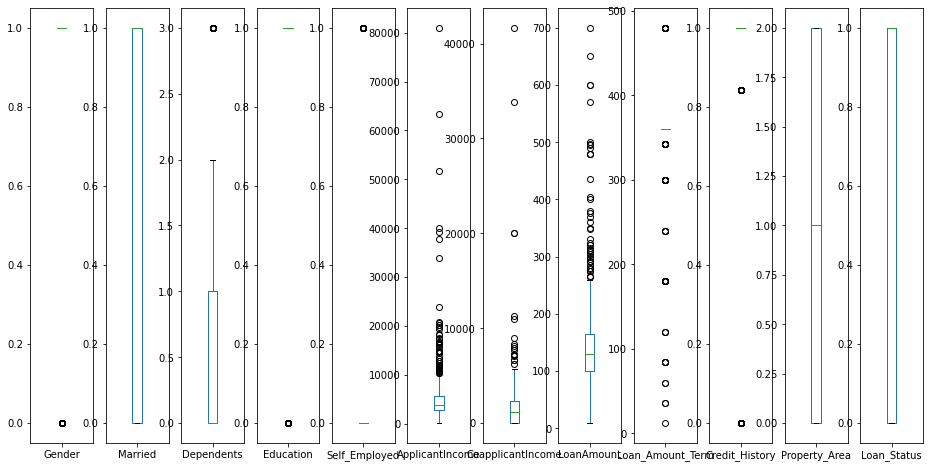

In [79]:
loan.plot(kind='box',subplots=True,figsize=[16,8])
plt.show()

Outliers present in few columns like applicant income, coapplicant income can be considered

In [80]:
x=loan.drop(['Loan_Status'],axis=1)
y=loan['Loan_Status']

In [81]:
x.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area        0.162812
dtype: float64

In [82]:
from sklearn.preprocessing import power_transform
loan_new = power_transform(x)
loan_new = pd.DataFrame(loan_new,columns = x.columns)
loan_new.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education           -1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.024376
Loan_Amount_Term     0.389827
Credit_History      -1.599912
Property_Area       -0.063959
dtype: float64

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=15)

In [86]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_predict =lr.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_accuracy)

0.8051948051948052


In [87]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)
print(gnb_accuracy_score)

0.8116883116883117


In [89]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_accuracy_score = accuracy_score(y_test,dt_predict)
print(dt_accuracy_score)

0.7012987012987013


In [90]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10)
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_accuracy_score = accuracy_score(y_test,rf_predict)
print(rf_accuracy_score)

0.7857142857142857


In [91]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr, x, y, cv=6)
print('Cross validation score of Logistic Regression : ',scr.mean())

Cross validation score of Logistic Regression :  0.8045878545592994


In [92]:
scr=cross_val_score(gnb, x, y, cv=6)
print('Cross validation score of Naive Bayes : ',scr.mean())

Cross validation score of Naive Bayes :  0.789929564058633


In [93]:
scr=cross_val_score(dt, x, y, cv=6)
print('Cross validation score of Decision Tree : ',scr.mean())

Cross validation score of Decision Tree :  0.7426708547496669


In [94]:
scr=cross_val_score(rf, x, y, cv=6)
print('Cross validation score of Random Forest Classifier : ',scr.mean())

Cross validation score of Random Forest Classifier :  0.7899454280093914


From all the above models we can find that the difference between cross validation and Logistic Regression model is minimum,

so Logistic Regression Model with 80.5% accuracy score is the best model

In [95]:
import joblib
joblib.dump(lr,'Loan_Prediction.pkl')

['Loan_Prediction.pkl']